In [1]:
import pandas as pd
import seaborn as sns
import random
import math

In [2]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.info()

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


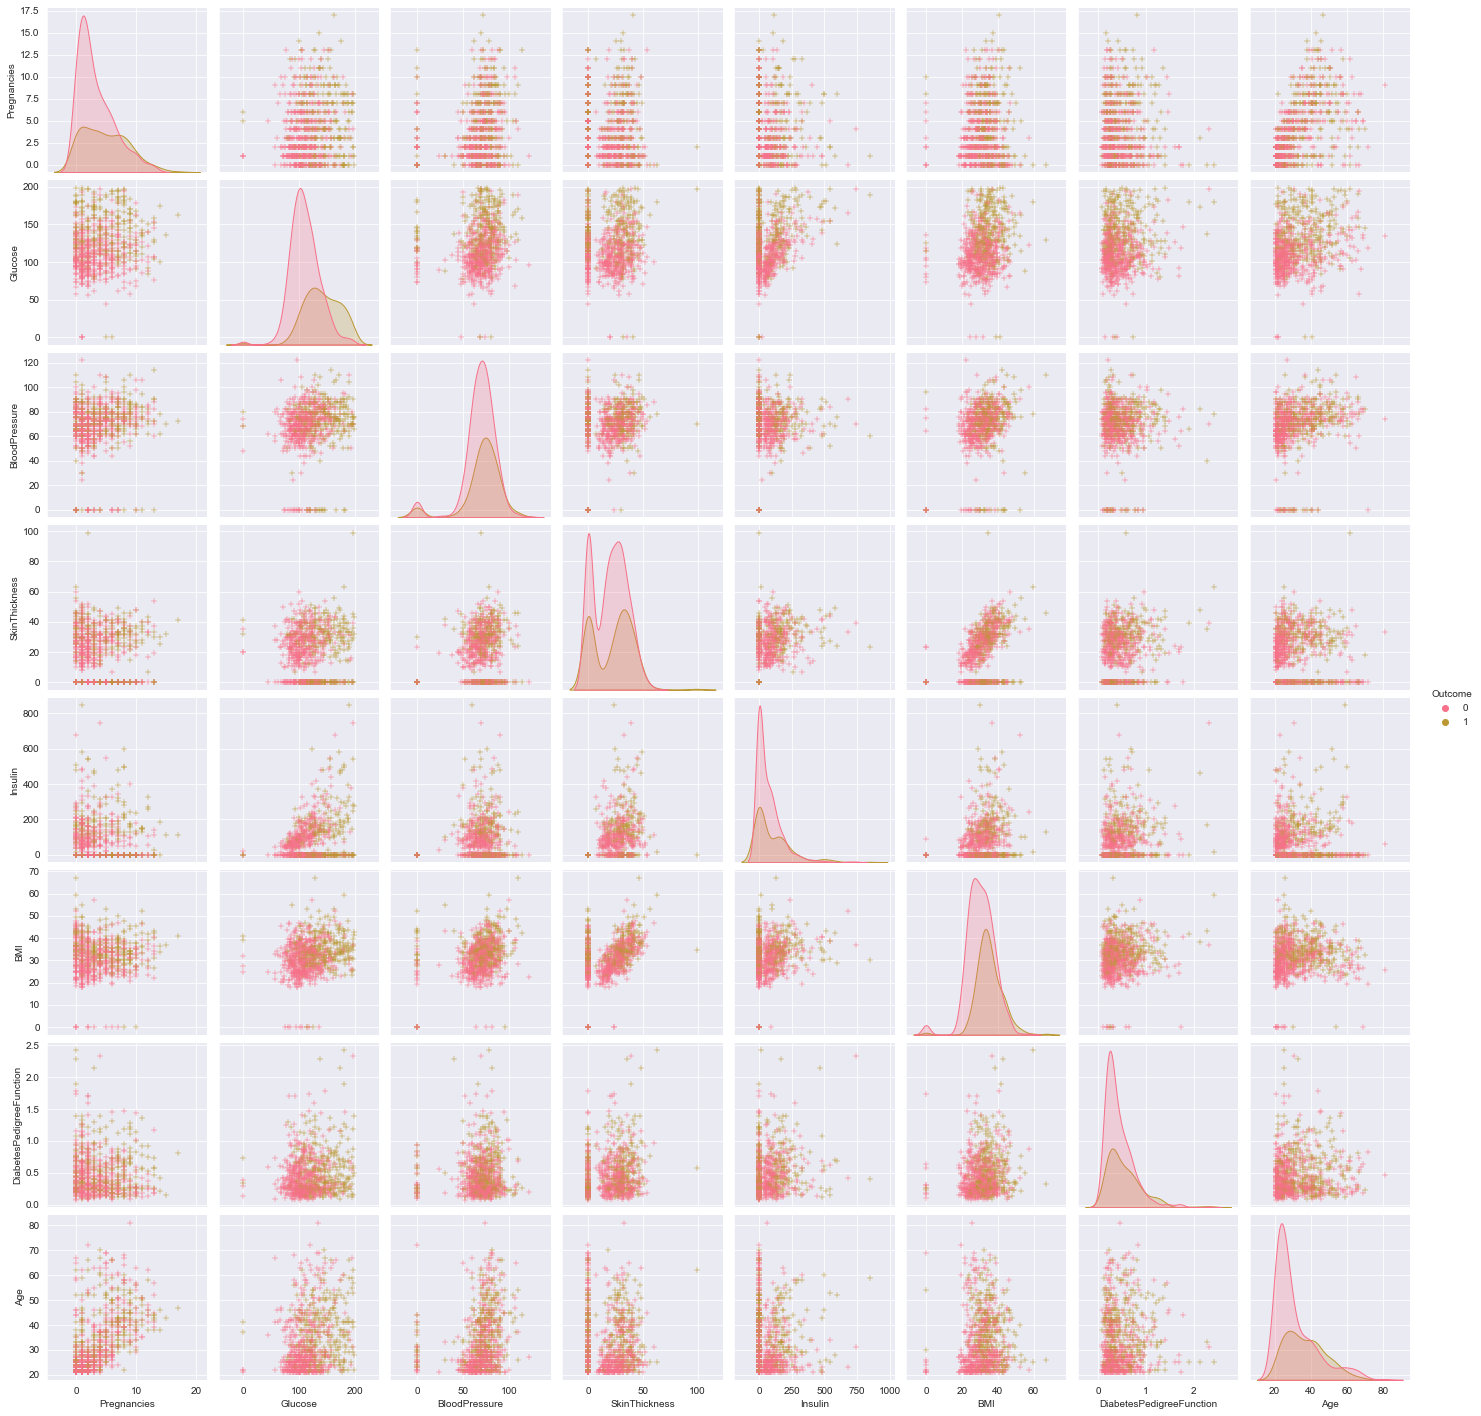

In [5]:
sns.set_palette('husl')
sns.pairplot(data, hue='Outcome', markers='+')

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

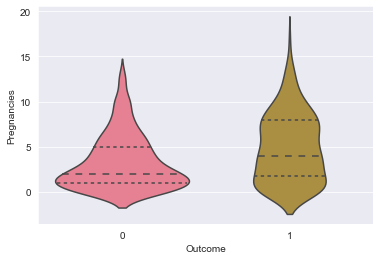

In [6]:
sns.violinplot(y='Pregnancies', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

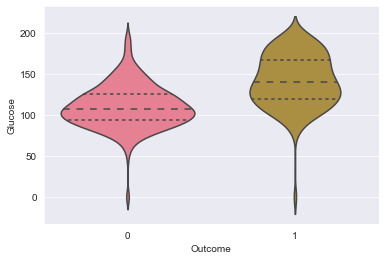

In [7]:
sns.violinplot(y='Glucose', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

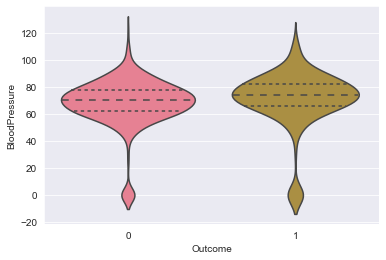

In [8]:
sns.violinplot(y='BloodPressure', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

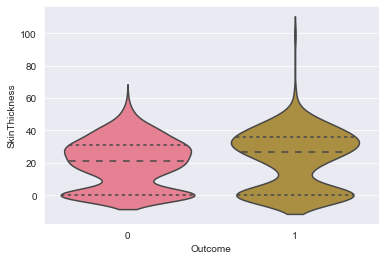

In [9]:
sns.violinplot(y='SkinThickness', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

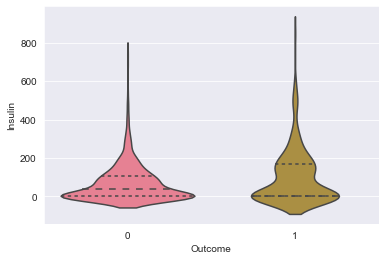

In [10]:
sns.violinplot(y='Insulin', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

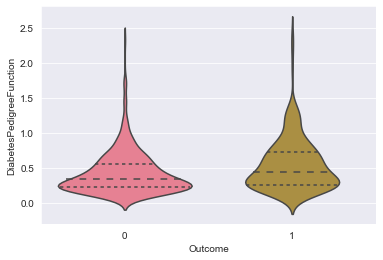

In [11]:
sns.violinplot(y='DiabetesPedigreeFunction', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

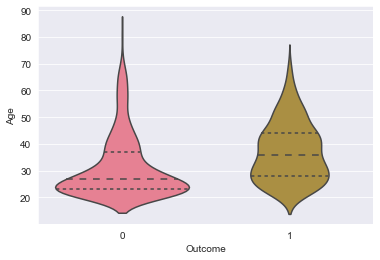

In [12]:
sns.violinplot(y='Age', x='Outcome', inner='quartile', data=data)

In [13]:
# Klasa statyczna zawierająca metody przydatne to przetwarzania danych
class ProcessingData:

    # metoda tasująca wiersze pd.DataFrame
    @staticmethod
    def shuffle(df: pd.DataFrame) -> pd.DataFrame:
        """
        Receives a DataFrame, randomly shuffles it and returns a shuffled version.
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        for idx in range(len(df) - 1, 0, -1):
            rand_idx = random.randint(0, idx)
            df.iloc[idx], df.iloc[rand_idx] = df.iloc[rand_idx], df.iloc[idx]
        return df

    # metoda normalizująca kolumny pd.DataFrame za pomocą normalizacji z użyciem odchylenia standardowego
    @staticmethod
    def normalize_std(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using min-max normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        normalized = df.drop(labels=label, axis=1)
        normalized = (normalized-normalized.mean())/(normalized.std())
        return normalized.join(df[label])

    # metoda normalizująca kolumny pd.DataFrame za pomocą normalizacji minmax
    @staticmethod
    def normalize_minmax(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using min-max normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        normalized = df.drop(labels=label, axis=1)
        normalized = (normalized-normalized.min())/(normalized.max()-normalized.min())
        return normalized.join(df[label])

    # metoda dzieląca pd.DataFrame na zbiór treningowy oraz walidacyjny
    @staticmethod
    def split(df: pd.DataFrame, ratio: float) -> tuple[pd.DataFrame, pd.DataFrame]:
        """
        Receives a DataFrame and returns two dataframes, split into training and validation DataFrames.
        :param df: pd.DataFrame
        :param ratio: float
        :return training_df, validation_df: tuple[pd.DataFrame, pd.DataFrame]
        """
        cutoff = int(len(df) * ratio)
        return df[:cutoff].reset_index(drop=True), df[cutoff:].reset_index(drop=True)

In [34]:
# Test metod klasy ProcessingData
shuffled_data = ProcessingData.shuffle(data)
shuffled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,11,120,80,37,150,42.3,0.785,48,1
1,4,125,80,0,0,32.3,0.536,27,1
2,3,158,70,30,328,35.5,0.344,35,1
3,1,125,70,24,110,24.3,0.221,25,0
4,13,104,72,0,0,31.2,0.465,38,1
...,...,...,...,...,...,...,...,...,...
763,1,139,62,41,480,40.7,0.536,21,0
764,1,125,50,40,167,33.3,0.962,28,1
765,9,124,70,33,402,35.4,0.282,34,0
766,2,74,0,0,0,0.0,0.102,22,0


In [35]:
normalized_data_std = ProcessingData.normalize_std(shuffled_data, 'Outcome')
normalized_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.123396,-0.027978,0.562856,1.032053,0.609147,1.307358,0.945055,1.255002,1
1,0.045984,0.128406,0.562856,-1.287373,-0.692439,0.038992,0.193535,-0.530677,1
2,-0.250789,1.160539,0.046215,0.593243,2.153696,0.444869,-0.385950,0.149582,1
3,-0.844335,0.128406,0.046215,0.217120,0.262057,-0.975700,-0.757183,-0.700742,0
4,2.716942,-0.528406,0.149543,-1.287373,-0.692439,-0.100528,-0.020754,0.404679,1
...,...,...,...,...,...,...,...,...,...
763,-0.844335,0.566280,-0.367098,1.282802,3.472636,1.104420,0.193535,-1.040871,0
764,-0.844335,0.128406,-0.987066,1.220115,0.756660,0.165829,1.479268,-0.445645,1
765,1.529850,0.097129,0.046215,0.781305,2.795812,0.432186,-0.573076,0.064549,0
766,-0.547562,-1.466709,-3.570271,-1.287373,-0.692439,-4.057829,-1.116343,-0.955839,0


In [36]:
# Test dla normalizacji std
normalized_training_data_std, normalized_validation_data_std = ProcessingData.split(normalized_data_std, 0.7)
normalized_training_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.123396,-0.027978,0.562856,1.032053,0.609147,1.307358,0.945055,1.255002,1
1,0.045984,0.128406,0.562856,-1.287373,-0.692439,0.038992,0.193535,-0.530677,1
2,-0.250789,1.160539,0.046215,0.593243,2.153696,0.444869,-0.385950,0.149582,1
3,-0.844335,0.128406,0.046215,0.217120,0.262057,-0.975700,-0.757183,-0.700742,0
4,2.716942,-0.528406,0.149543,-1.287373,-0.692439,-0.100528,-0.020754,0.404679,1
...,...,...,...,...,...,...,...,...,...
532,1.233077,-0.278192,0.149543,-1.287373,-0.692439,-1.064486,1.111053,2.105325,0
533,-0.547562,-1.247772,-0.470426,0.091745,-0.692439,-0.544456,-0.548930,-0.700742,0
534,-0.547562,-0.403299,0.562856,-1.287373,-0.692439,-0.633242,-0.642493,1.595131,1
535,3.013715,-0.653513,0.459528,0.279807,0.904173,0.584390,-0.180716,1.084937,1


In [37]:
normalized_validation_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.547562,1.066709,0.252871,-0.221691,0.140576,-0.683976,-0.117335,-0.530677,1
1,1.529850,-0.935004,-0.057113,-1.287373,-0.692439,-0.988384,-0.820564,2.105325,0
2,0.639530,1.942458,1.286153,-1.287373,-0.692439,1.117103,2.985325,0.999905,0
3,-1.141108,-0.434576,-0.367098,0.593243,-0.050323,0.584390,0.860547,-0.700742,1
4,-0.250789,-0.246915,-1.297051,-0.472440,-0.692439,-1.216690,-1.001653,-0.955839,0
...,...,...,...,...,...,...,...,...,...
226,-0.844335,0.566280,-0.367098,1.282802,3.472636,1.104420,0.193535,-1.040871,0
227,-0.844335,0.128406,-0.987066,1.220115,0.756660,0.165829,1.479268,-0.445645,1
228,1.529850,0.097129,0.046215,0.781305,2.795812,0.432186,-0.573076,0.064549,0
229,-0.547562,-1.466709,-3.570271,-1.287373,-0.692439,-4.057829,-1.116343,-0.955839,0


In [38]:
normalized_data_minmax = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
normalized_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647059,0.603015,0.655738,0.373737,0.177305,0.630402,0.301879,0.450000,1
1,0.235294,0.628141,0.655738,0.000000,0.000000,0.481371,0.195559,0.100000,1
2,0.176471,0.793970,0.573770,0.303030,0.387707,0.529061,0.113578,0.233333,1
3,0.058824,0.628141,0.573770,0.242424,0.130024,0.362146,0.061059,0.066667,0
4,0.764706,0.522613,0.590164,0.000000,0.000000,0.464978,0.165243,0.283333,1
...,...,...,...,...,...,...,...,...,...
763,0.058824,0.698492,0.508197,0.414141,0.567376,0.606557,0.195559,0.000000,0
764,0.058824,0.628141,0.409836,0.404040,0.197400,0.496274,0.377455,0.116667,1
765,0.529412,0.623116,0.573770,0.333333,0.475177,0.527571,0.087105,0.216667,0
766,0.117647,0.371859,0.000000,0.000000,0.000000,0.000000,0.010248,0.016667,0


In [39]:
# Test dla normalizacji minmax
normalized_training_data_minmax, normalized_validation_data_minmax = ProcessingData.split(normalized_data_minmax, 0.7)
normalized_training_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647059,0.603015,0.655738,0.373737,0.177305,0.630402,0.301879,0.450000,1
1,0.235294,0.628141,0.655738,0.000000,0.000000,0.481371,0.195559,0.100000,1
2,0.176471,0.793970,0.573770,0.303030,0.387707,0.529061,0.113578,0.233333,1
3,0.058824,0.628141,0.573770,0.242424,0.130024,0.362146,0.061059,0.066667,0
4,0.764706,0.522613,0.590164,0.000000,0.000000,0.464978,0.165243,0.283333,1
...,...,...,...,...,...,...,...,...,...
532,0.470588,0.562814,0.590164,0.000000,0.000000,0.351714,0.325363,0.616667,0
533,0.117647,0.407035,0.491803,0.222222,0.000000,0.412817,0.090521,0.066667,0
534,0.117647,0.542714,0.655738,0.000000,0.000000,0.402385,0.077284,0.516667,1
535,0.823529,0.502513,0.639344,0.252525,0.217494,0.545455,0.142613,0.416667,1


In [40]:
normalized_validation_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.117647,0.778894,0.606557,0.171717,0.113475,0.396423,0.151580,0.100000,1
1,0.529412,0.457286,0.557377,0.000000,0.000000,0.360656,0.052092,0.616667,0
2,0.352941,0.919598,0.770492,0.000000,0.000000,0.608048,0.590521,0.400000,0
3,0.000000,0.537688,0.508197,0.303030,0.087470,0.545455,0.289923,0.066667,1
4,0.176471,0.567839,0.360656,0.131313,0.000000,0.333830,0.026473,0.016667,0
...,...,...,...,...,...,...,...,...,...
226,0.058824,0.698492,0.508197,0.414141,0.567376,0.606557,0.195559,0.000000,0
227,0.058824,0.628141,0.409836,0.404040,0.197400,0.496274,0.377455,0.116667,1
228,0.529412,0.623116,0.573770,0.333333,0.475177,0.527571,0.087105,0.216667,0
229,0.117647,0.371859,0.000000,0.000000,0.000000,0.000000,0.010248,0.016667,0


In [41]:
# Klasa NaiveBayes zawierająca klasyfikator Bayesa oraz metody pomocnicze
from functools import reduce


class NaiveBayes:
    """
    labels - stores all the labels existing within the column that we want to predict
    values - stores the mean and standard deviation values of all the columns and labels into the class attribute values
    """
    labels: list[str] = []
    values: list[list[list[float, float]]] = []

    # metoda pomocnicza licząca średnią wartość w kolumnie
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda pomocnicza licząca odchylenie standardowe wartości w kolumnie
    @staticmethod
    def std_dev(column: list[float], m: float) -> float:
        """
        Receives a column of the dataframe and its mean value and returns its standard deviation.
        :param column: list[float]
        :param m: float
        :return standard deviation of the values in a dataframe column: float
        """
        return math.sqrt(sum(map(lambda x: (x - m) ** 2, column)) / len(column))

    # metoda pomocnicza obliczająca gęstość prawdopodobieństwa
    @staticmethod
    def density(x: float, m: float, sd: float) -> float:
        """
        Receives a value, plus a mean value and a standard deviation of the values in a certain column, and returns its Gaussian probability.
        :param x: float
        :param m: float
        :param sd: float
        :return Gaussian probability: float
        """
        return math.exp(-(x - m) ** 2 / (2 * sd ** 2)) / (math.sqrt(2 * math.pi) * sd)

    # metoda obliczająca wartości przechowywane w tablicach pomocniczych klasy
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and loads mean and standard deviation values into the class attribute values.
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.values = []
        self.labels = df[label].unique()
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            column = [[self.mean(item), self.std_dev(item, self.mean(item))] for _, item in category_values.items()]
            self.values.append(column)

    # metda przewidująca etykiety klas próbek
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label.
        :param sample: pd.Series
        :param label: str - column with class labels
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category in self.values:
            category_pairs = []
            for pair, x in zip(category, sample):
                category_pairs.append(self.density(x, pair[0], pair[1]))
            probabilities.append(reduce(lambda z, y: z * y, category_pairs))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność przewidywań
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str - column with class labels
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [42]:
# Test Bayesa dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 68.40%; 158/231
Accuracy: 76.62%; 177/231
Accuracy: 74.89%; 173/231
Accuracy: 73.16%; 169/231
Accuracy: 74.46%; 172/231


In [43]:
# Test Bayesa dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 74.89%; 173/231
Accuracy: 73.59%; 170/231
Accuracy: 76.19%; 176/231
Accuracy: 71.86%; 166/231
Accuracy: 75.32%; 174/231


In [44]:
# Test Bayesa dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(training_data, 'Outcome')
    NB.test(validation_data, 'Outcome')

Accuracy: 77.06%; 178/231
Accuracy: 76.19%; 176/231
Accuracy: 71.00%; 164/231
Accuracy: 73.16%; 169/231
Accuracy: 74.89%; 173/231


In [45]:
# Klasa statyczna KNN zawierająca klasyfikator KNN oraz metody pomocnicze
from collections import Counter

class KNN:

    # metoda obliczająca odległość między próbkami za pomocą metryki
    @staticmethod
    def distance(x: pd.Series, y: pd.Series, m: int, label: str) -> float:
        """
        :param x: pd.Series - a record from a dataset to calculate the distance
        :param y: pd.Series - a record from a dataset to calculate the distance
        :param m: int - to calculate the mth root in Euclidean metric
        :param label: str - column with class labels
        :return: float - the distance between two records
        """
        s = 0
        x = x.drop(labels=label)
        y = y.drop(labels=label)
        for xi, yi in zip(x, y):
            s += pow(abs(xi - yi), m)
        return pow(s, 1 / m)

    # metoda przewidująca etykietę klasy próbki na podstawie etykiet jej k-najbliższych sąsiadów
    @staticmethod
    def cluster(sample: pd.Series, training_set: pd.DataFrame, k: int, m: int, label: str) -> str:
        """
        :param sample: pd.Series - a record from the validation dataset
        :param training_set: pd.DataFrame - training dataset
        :param k: int - k-nearest elements
        :param m: int - to pass into KNN.distance
        :param label: str - name of the label that we want to predict
        :return: str - predicted label of the object
        """
        distances = [(KNN.distance(sample, training_set.iloc[idx], m, label), training_set.iloc[idx][label]) for idx in training_set.index]
        distances = sorted(distances, key=lambda d: (d, random.random()))[:k]
        return max(dict(Counter(elem[1] for elem in distances)))

    # metoda testująca dokładność działania
    @staticmethod
    def test(training_set: pd.DataFrame, validation_set: pd.DataFrame, k0: int, kn: int, m: int, label: str) -> None:
        """
        :param training_set: pd.Series - a record from the validation dataset
        :param validation_set: pd.DataFrame - training dataset
        :param k0: int - starting value of k to pass into KNN.cluster
        :param kn: int - end value of k to pass into KNN.cluster
        :param m: int - to pass into KNN.cluster
        :param label: str - name of the label that we want to predict
        :return: None
        """
        for k in range(k0, kn + 1):
            correct = 0
            for sample in validation_set.iloc:
                x = KNN.cluster(sample, training_set, k, m, label)
                if x == sample[label]:
                    correct += 1
            print(f'Accuracy for {k=}: {float(correct) / len(validation_set) * 100:.2f}%, correct predictions: {correct}/{len(validation_set)}')

In [46]:
# Test KNN dla danych znormalizowanych std:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')


KeyboardInterrupt



In [ ]:
# Test KNN dla danych znormalizowanych minmax:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')

In [ ]:
# Test KNN dla danych nieznormalizowanych:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    KNN.test(training_set=training_data, validation_set=validation_data, k0=2, kn=4, m=2, label='Outcome')

In [ ]:
# Klasa SoftSetClassifierMean zawierająca klasyfikator miękki korzystający ze średniej arytmetycznej oraz metody pomocnicze
class SoftSetClassifierMean:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores 0 and 1 pairs for every label for every column
    means - stores mean values for every label for every column
    """
    labels: list[str] = []
    pairs: list[list[list[int, int]]] = []
    means: list[list[float]] = []

    # metoda pomocnicza obliczająca średnie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda tworząca tabelę ważoną zbioru miękkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.means = []
        self.labels = sorted(df[label].unique())
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_mean = []
            temp_pair = []
            for _, item in category_values.items():
                mean = self.mean(item)
                temp_mean.append(mean)
                len_lower = 0
                len_upper = 0
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                else:
                    temp_pair.append([0, 1])

            self.means.append(temp_mean)
            self.pairs.append(temp_pair)

    # metoda przewidująca etykietę klasy próbki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category, mean in zip(self.pairs, self.means):
            sample_pairs = []
            for m, x in zip(mean, sample):
                if x == m:
                    sample_pairs.append(random.choice(([0, 1],[1, 0])))
                elif x > m:
                    sample_pairs.append([1, 0])
                else:
                    sample_pairs.append([0, 1])
            temp = []
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność działania Klasyfikatora miękkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [ ]:
# Test Klasyfikatora miękkiego ze średnią dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

In [ ]:
# Test Klasyfikatora miękkiego ze średnią dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

In [ ]:
# Test Klasyfikatora miękkiego ze średnią dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')

In [14]:
# Klasa SoftSetClassifierPercentage zawierająca klasyfikator miękki korzystający z procentów oraz metody pomocnicze
class SoftSetClassifierPercentage:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores pairs of values between 0 and 1 for every label for every column
    minmaxs - stores min and max pairs of values for every label for every column
    """
    labels: list[str] = []
    pairs: list[list[list[int, int]]] = []
    minmaxs: list[list[list[float, float]]] = []

     # metoda pomocnicza obliczająca średnie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda tworząca tabelę ważoną zbioru miękkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.minmaxs = []
        self.labels = sorted(df[label].unique())
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_minmax = []
            temp_pair = []
            for _, item in category_values.items():
                min_t = min(item)
                max_t = max(item)
                temp_minmax.append([min_t, max_t])
                mean = self.mean(item)
                len_lower = 0
                len_upper = 0
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                else:
                    temp_pair.append([0, 1])

            self.minmaxs.append(temp_minmax)
            self.pairs.append(temp_pair)

    # metoda przewidująca etykietę klasy próbki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category, minmax in zip(self.pairs, self.minmaxs):
            sample_pairs = []
            for pair, x in zip(minmax, sample):
                proportion = (x - pair[0]) / (pair[1] - pair[0])
                sample_pairs.append([1 - proportion, proportion])
            temp = []
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność działania Klasyfikatora miękkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [15]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 58.87%; 136/231
Accuracy: 64.50%; 149/231
Accuracy: 30.30%; 70/231
Accuracy: 60.61%; 140/231
Accuracy: 54.11%; 125/231


In [16]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 45.89%; 106/231
Accuracy: 64.94%; 150/231
Accuracy: 41.13%; 95/231
Accuracy: 29.87%; 69/231
Accuracy: 64.07%; 148/231


In [17]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')

Accuracy: 61.47%; 142/231
Accuracy: 65.37%; 151/231
Accuracy: 34.63%; 80/231
Accuracy: 59.31%; 137/231
Accuracy: 44.16%; 102/231


In [ ]:
# Klasa FuzzyClassifier zawierająca klasyfikator zbiorów rozmytych oraz metody pomocnicze
class FuzzyClassifier:
    """
    Normy:
    Pregnancies:
    -
    Glucose:
    - 70-99 prawidlowe
    - 100-125 ryzyko
    - 126+ cukrzyca
    BloodPressure:
    - <80 prawidlowe
    - 80-89 podwyzszone faza 1
    - >90 podwyszone faza 2
    SkinThickness:
    -
    Insulin:
    - <30
    Age:
    -
    """
    # TODO rozmyte
    @staticmethod
    def whatever():
        print('Działa')